# MINI PROJECT - 2
# CLASSIFICATION- People who have been churned out .

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore') 

# Data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Metric evalutation
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# For Naive Bayes 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap 

# For decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Stacking 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# Grid Search for cross validation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
data = pd.read_csv("DS3_C6_S2_Classification_BankChurn_Data_Project.csv")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# --------------------------------------------------------------------------------------------------------Checking for null values and/noise values

In [3]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## There are no null values 

In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print("------------------------------")

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
------------------------------
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
------------------------------
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
------------------------------
France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------
37    478

## There are noise values in the geography column as there are more than 3 countries in the data. As there is spelling errors, replacing the values by the appropriate values 

In [6]:
data['Geography'].value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64

In [7]:
data['Geography'] = data['Geography'].replace(to_replace = ('france','fra'), value = 'France')
data['Geography'] = data['Geography'].replace(to_replace = ('espanio','spain'), value = 'Spain')
data['Geography'] = data['Geography'].replace(to_replace = ('ger','germany','gernamy','GERMANY'), value = 'Germany')
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# --------------------------------------------------------------------------------------------------------- Feature Engineering 

In [8]:
df = data.copy()

In [9]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
cat_data = df.select_dtypes(exclude = [np.number])

for i in cat_data.columns:
    
    df[i] = df[i].astype('category')

df.dtypes

CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [11]:
# Label encoding

for i in cat_data.columns:
    df[i] = preprocessing.LabelEncoder().fit_transform(df[i])

df.dtypes

CustomerId           int64
Surname              int32
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# ------------------------------------------------------------------------------------------------------------    Data Scaling

In [12]:
num_df = df.select_dtypes(include = [np.number])

scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns = num_df.columns)

scaled_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.162119,0.682020,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.016765,0.455817,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.075327,0.535653,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.466637,0.800068,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


In [13]:
scaled_df['Exited'] = data['Exited']
scaled_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


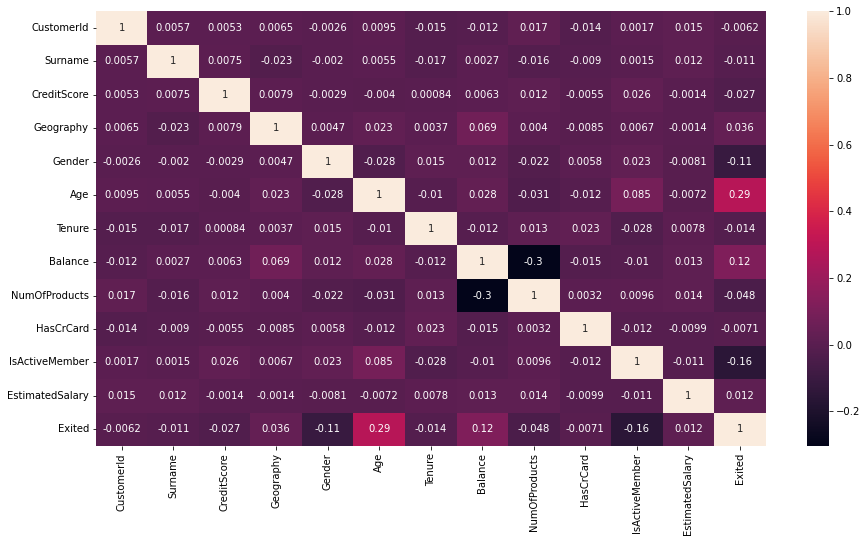

In [14]:
corr_values = scaled_df.corr()

plt.figure(figsize=(15,8))
sb.heatmap(corr_values, annot= True, cbar = True)
plt.show()

# Evaluation of the correlation values/score 


# Univariate logistic regression 
## 'Age' (0.29) has the highest corr value with the target variable ie. 'Exited' therefore considering 'Age' column for the Univariate model

# Bivariate Logistic regression
## ''Age'(0.29) and 'IsActiveMember'(-0.16) can be taken for bivariate analysis as both of these features are highly correalted to target feature when compared to remainder features and also due to the fact that the correlation of these two features to each other is less hence reducing collinearity 

# Multivariate Logistic Regression 
## Due to low correlation with the target features dropping Customer_id and HasCrCard
## using all the rest features for model training 



# ----------------------------------------------------------------------------------------------------------- Exploratory Data Analysis 

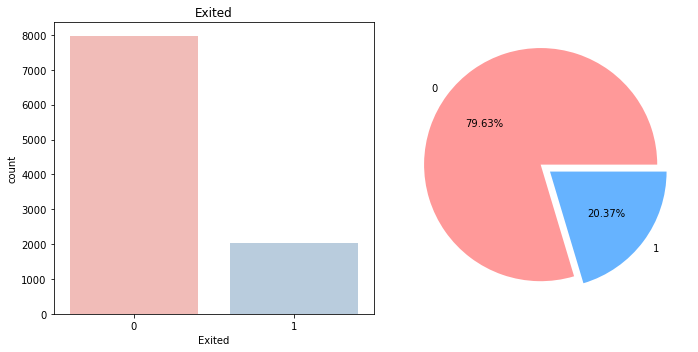

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Exited")
sb.countplot(data = data, x = data['Exited'], palette = 'Pastel1')


plt.subplot(122)
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)
tot_count = data['Exited'].value_counts()  
uni =  list(data['Exited'].value_counts().index)         
plt.pie(tot_count, labels = uni, autopct='%.2f%%', explode = explode, colors = colors)
plt.tight_layout()
plt.show()

## Nearly 80% of people in the data are still working with the company while nearly 20 % of the people have exited  

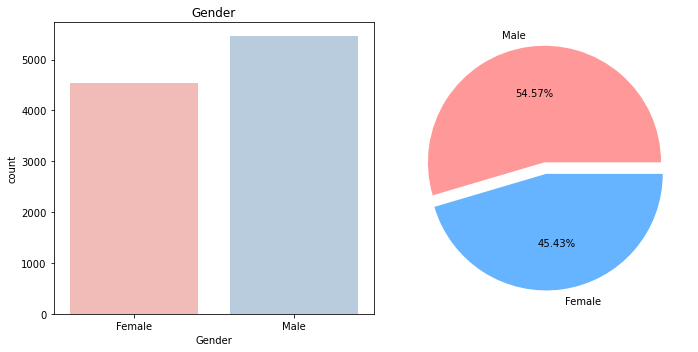

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Gender")
sb.countplot(data = data, x = data['Gender'], palette = 'Pastel1')


plt.subplot(122)
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)  
tot_count = data['Gender'].value_counts()  
uni =  list(data['Gender'].value_counts().index)         
plt.pie(tot_count, labels = uni, autopct='%.2f%%', explode = explode, colors = colors)
plt.tight_layout()
plt.show()

## In the company there nearly 55 % males where as there are 45% female

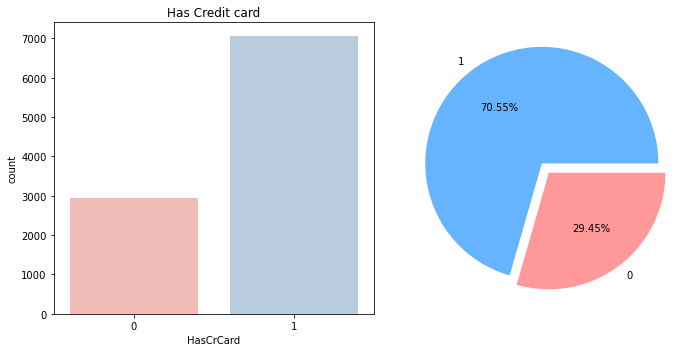

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Has Credit card")
sb.countplot(data = data, x = data['HasCrCard'], palette = 'Pastel1')


plt.subplot(122)
colors = ['#66b3ff','#ff9999']
explode = (0.05,0.05)  
tot_count = data['HasCrCard'].value_counts()  
uni =  list(data['HasCrCard'].value_counts().index)         
plt.pie(tot_count, labels = uni, autopct='%.2f%%', explode = explode, colors = colors)
plt.tight_layout()
plt.show()

## There are 70% people who have credit cards where as there are 30% doesnot have

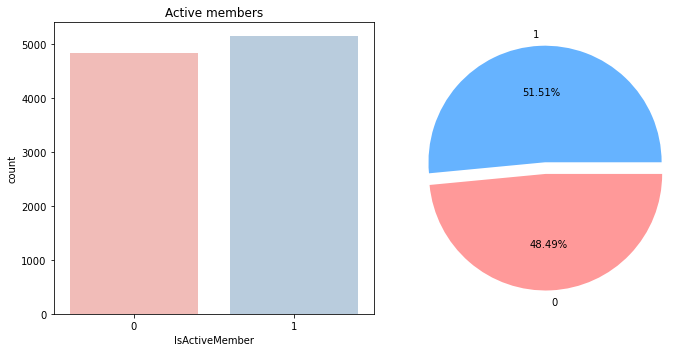

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Active members")
sb.countplot(data = data, x = data['IsActiveMember'], palette = 'Pastel1')


plt.subplot(122)
colors = ['#66b3ff','#ff9999']
explode = (0.05,0.05)
tot_count = data['IsActiveMember'].value_counts()  
uni =  list(data['IsActiveMember'].value_counts().index)         
plt.pie(tot_count, labels = uni, autopct='%.2f%%', explode = explode, colors = colors)
plt.tight_layout()
plt.show()

## There are approx equal number of people who are active members and who are not 

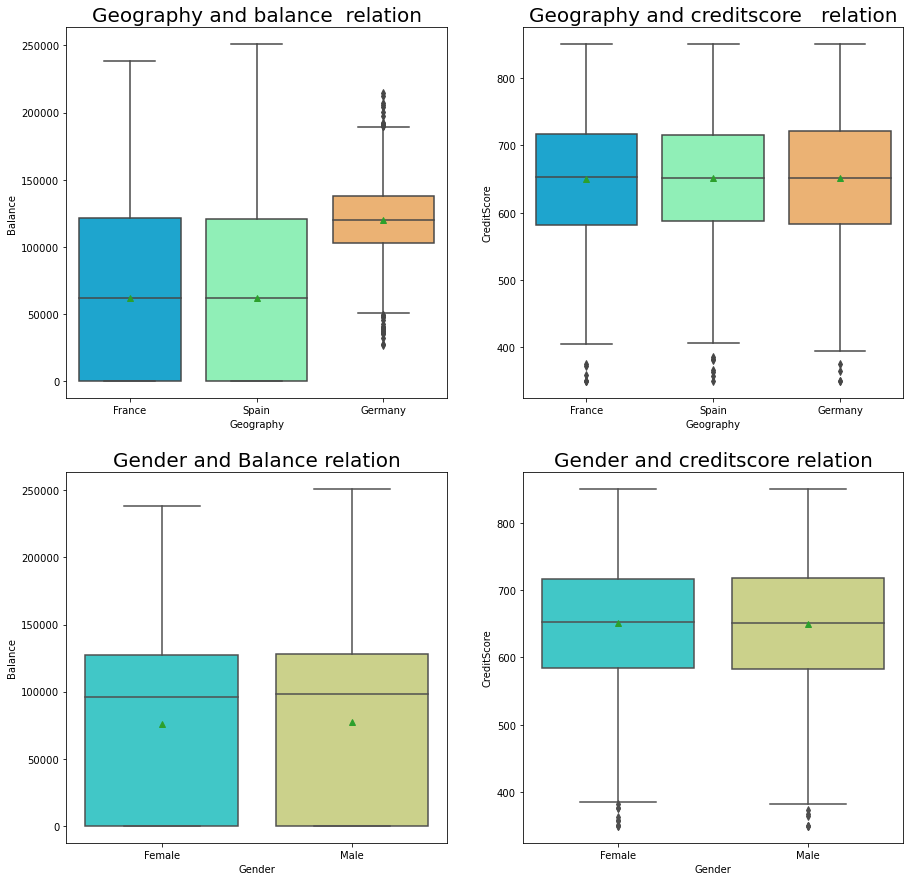

In [19]:
plt.figure(figsize = (15,15))


plt.subplot(221)
plt.title("Geography and balance  relation", fontsize = 20)
sb.boxplot(data=data, x= 'Geography', y='Balance', palette = 'rainbow', showmeans = True)

plt.subplot(222)
plt.title("Geography and creditscore   relation", fontsize = 20)
sb.boxplot(data=data, x= 'Geography', y='CreditScore', palette = 'rainbow', showmeans = True)


plt.subplot(223)
plt.title("Gender and Balance relation", fontsize = 20)
sb.boxplot(data=data, x= 'Gender', y='Balance', palette = 'rainbow', showmeans = True)

plt.subplot(224)
plt.title("Gender and creditscore relation", fontsize = 20)
sb.boxplot(data=data, x= 'Gender', y='CreditScore', palette = 'rainbow', showmeans = True)

plt.show()

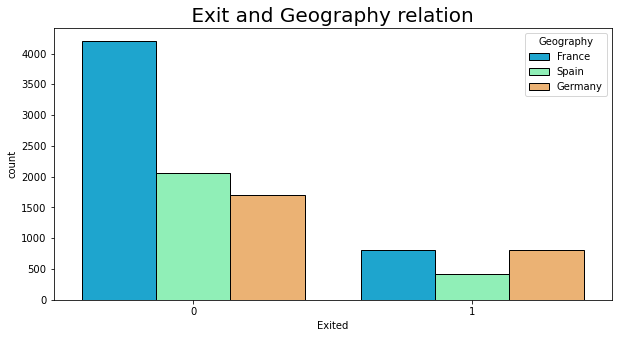

In [20]:
plt.figure(figsize = (10,5))

plt.title(" Exit and Geography relation ", fontsize = 20)
sb.countplot( data = data, x = data['Exited'], hue = data['Geography'], palette = 'rainbow',ec = 'black')
plt.show()

# More People from france and germany have left the company have exite the company

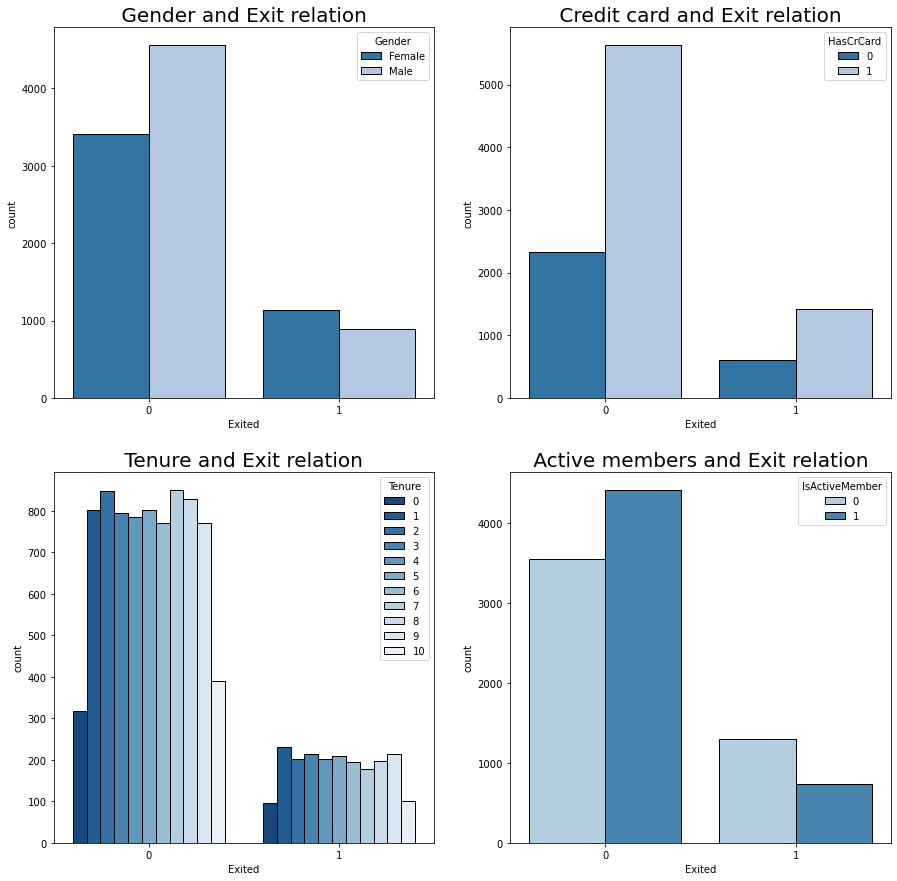

In [21]:
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.title(" Gender and Exit relation ", fontsize = 20)
sb.countplot( data = data, x = data['Exited'], hue = data['Gender'], palette = 'tab20',ec = 'black')


plt.subplot(222)
plt.title(" Credit card and Exit relation ", fontsize = 20)
sb.countplot( data = data, x = data['Exited'], hue = data['HasCrCard'], palette = 'tab20',ec = 'black')


plt.subplot(224)
plt.title(" Active members and Exit relation ", fontsize = 20)
sb.countplot( data = data, x = data['Exited'], hue = data['IsActiveMember'], palette = 'Blues',ec = 'black')


plt.subplot(223)
plt.title(" Tenure and Exit relation ", fontsize = 20)
sb.countplot( data = data, x = data['Exited'], hue = data['Tenure'], palette = 'Blues_r',ec = 'black')

plt.show()

## 1. There are more females who have exited the company while there are more number of males who are still with the company
## 2. more Non members have left the compamy as compared to members
## 3. More People with 1 year experience have left the company 

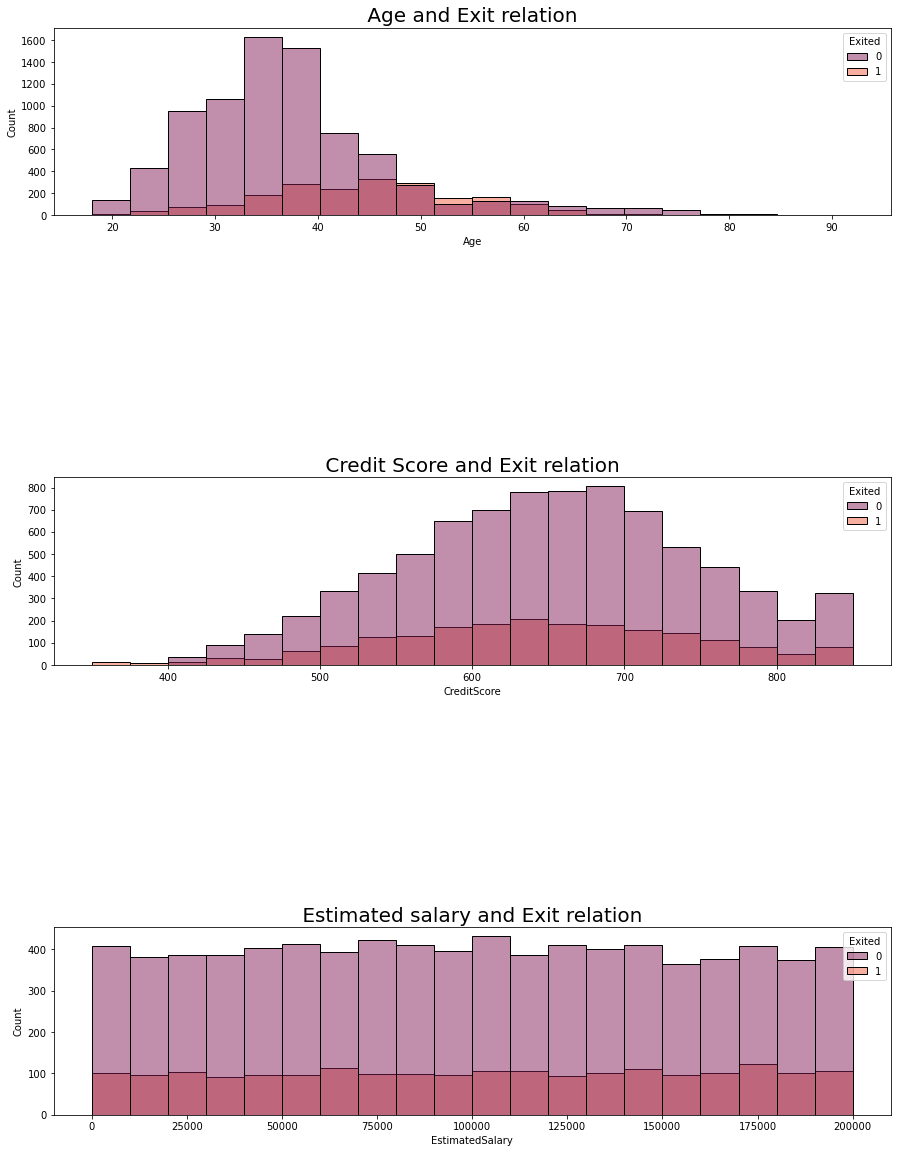

In [22]:
plt.figure(figsize=(15,20)) 

plt.subplot(511)
plt.title(" Age and Exit relation ", fontsize = 20)
sb.histplot( data = df, x = df['Age'], hue=df['Exited'], palette = 'rocket', bins = 20)

plt.subplot(513)
plt.title(" Credit Score and Exit relation ", fontsize = 20)
sb.histplot( data = df, x = df['CreditScore'], hue=df['Exited'], palette = 'rocket', bins = 20)

plt.subplot(515)
plt.title(" Estimated salary and Exit relation ", fontsize = 20)
sb.histplot( data = df, x = df['EstimatedSalary'], hue=df['Exited'], palette = 'rocket', bins = 20)

plt.show()

## 1. The people under age group 43-45 have more people who have exited the company.
## 2. Most people who have left the company belongs to 625-650 credit score range.
## 3. Mostly the data is evenly distributed  for people who have left the company across asll salary slabs 

# ----------------------------------------------------------------------------------------------------------- Univariate Logistic regression model  

### removing all infinite values from scaled df

In [23]:
scaled_df = scaled_df[np.isfinite(scaled_df).all(1)]

In [24]:
scaled_df.shape

(10000, 13)

In [25]:
scaled_df.reset_index(inplace = False)
scaled_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


In [26]:
x1 = scaled_df['Age']
y1 = scaled_df['Exited']

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 10)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((8000,), (2000,), (8000,), (2000,))

In [28]:
x1_train = x1_train.values.reshape(-1,1)
y1_train = y1_train.values.reshape(-1,1)
x1_test = x1_test.values.reshape(-1,1)
y1_test = y1_test.values.reshape(-1,1)

x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((8000, 1), (2000, 1), (8000, 1), (2000, 1))

In [29]:
model_1 = LogisticRegression().fit(x1_train, y1_train)

In [30]:
# Slope/m value of the equation
slope1 = model_1.coef_
print("Slope of the equation (Linear Regression Coefficient = ",slope1)

# Intercept value of the equation
intercept1 = model_1.intercept_
print("Intercept of the equation = ",intercept1)

Slope of the equation (Linear Regression Coefficient =  [[4.41408785]]
Intercept of the equation =  [-2.73470305]


In [31]:
# Y predicted values 
y_predict1 = model_1.predict(x1_test)

model1_pred = pd.DataFrame()
model1_pred['Y Actual'] = pd.DataFrame(y1_test)
model1_pred['Y Predicted'] = pd.DataFrame(y_predict1)
model1_pred.round(2)

,Y Actual,Y Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,1,0
1998,0,1


In [32]:
# Accuracy value for logistic regression
train_accuracy1 = round(model_1.score(x1_train, y1_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy1))
test_accuracy1 = round(model_1.score(x1_test, y1_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy1))


Train Accuracy = 77.62 %
Test Accuracy = 77.2 %


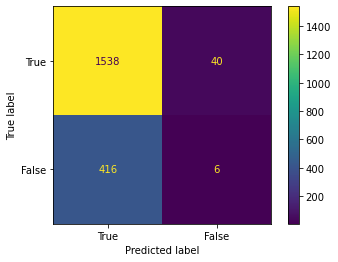

In [33]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix1 = confusion_matrix(y1_test, y_predict1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [True, False])

cm_display.plot()
plt.show()

## Conclusion: There are 1538 True Positive where are there are 6 True Negative and there are 416 False Positve where 40 False Negative 

In [34]:
# Different metric values of the model performance 

acc_score1 = round((accuracy_score(y1_test, y_predict1))*100,2)
f1_score1 = round((f1_score(y1_test, y_predict1))*100,2)
recall_score1 = round((recall_score(y1_test, y_predict1))*100,2)
prec_score1 = round((precision_score(y1_test, y_predict1))*100,2)


print('Accuracy  = {}% '.format(acc_score1))
print('F1 Score  = {}% '.format(f1_score1))
print('Recall    = {}% '.format(recall_score1))
print('Precision = {}% '.format(prec_score1))

Accuracy  = 77.2% 
F1 Score  = 2.56% 
Recall    = 1.42% 
Precision = 13.04% 


# Since the F1 score is 2.56% this is a not a good model for predicting the values 

# ----------------------------------------------------------------------------------------------------------- Bivariate Logistic regression model 

In [35]:
x2 = scaled_df[['Age','IsActiveMember']]
y2 = scaled_df['Exited']

In [36]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 10)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [37]:
y2_train = y2_train.values.reshape(-1,1)
y2_test = y2_test.values.reshape(-1,1)
y2_train.shape, y2_test.shape

((8000, 1), (2000, 1))

In [38]:
model_2 = LogisticRegression().fit(x2_train, y2_train)

In [39]:
# Slope/m value of the equation
slope2 = model_2.coef_
print("Slope of the equation (Linear Regression Coefficient) = ",slope2)

# Intercept value of the equation
intercept2 = model_2.intercept_
print("Intercept of the equation = ",intercept2)

Slope of the equation (Linear Regression Coefficient) =  [[ 5.11953922 -1.07624724]]
Intercept of the equation =  [-2.47946197]


In [40]:
# Y predicted values 
y_predict2 = model_2.predict(x2_test)

model2_pred = pd.DataFrame()
model2_pred['Y Actual'] = pd.DataFrame(y2_test)
model2_pred['Y Predicted'] = pd.DataFrame(y_predict2)
model2_pred.round(2)

,Y Actual,Y Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
1995,0,0
1996,0,0
1997,1,0
1998,0,0


In [41]:
# Accuracy value for logistic regression
train_accuracy2 = round(model_2.score(x2_train, y2_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy2))
test_accuracy2 = round(model_2.score(x2_test, y2_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy2))


Train Accuracy = 80.77 %
Test Accuracy = 79.85 %


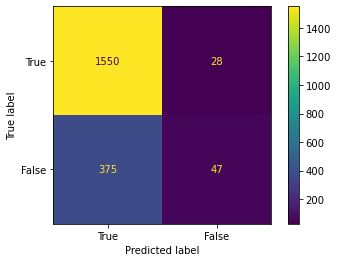

In [42]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix2 = confusion_matrix(y2_test, y_predict2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [True, False])

cm_display.plot()
plt.show()

## Conclusion: There are 1550 True Positive where are there are 47 True Negative and there are 375 False Positve where 47 False Negative 

In [43]:
# Different metric values of the model performance 

acc_score2 = round((accuracy_score(y2_test, y_predict2))*100,2)
f1_score2 = round((f1_score(y2_test, y_predict2))*100,2)
recall_score2 = round((recall_score(y2_test, y_predict2))*100,2)
prec_score2 = round((precision_score(y2_test, y_predict2))*100,2)


print('Accuracy  = {}% '.format(acc_score2))
print('F1 Score  = {}% '.format(f1_score2))
print('Recall    = {}% '.format(recall_score2))
print('Precision = {}% '.format(prec_score2))

Accuracy  = 79.85% 
F1 Score  = 18.91% 
Recall    = 11.14% 
Precision = 62.67% 


# Since the F1 score is 18.91% this is a not a good model for predicting the values 

# ----------------------------------------------------------------------------------------------------------- Multi-variate Logistic regression model 

In [44]:
scaled_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.162119,0.682020,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,0.016765,0.455817,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,0.075327,0.535653,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,0.466637,0.800068,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [45]:
x3 = scaled_df.copy()
x3.drop(['CustomerId','Exited','HasCrCard'], axis =1, inplace = True)
x3.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735
1,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709
2,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654
3,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120
4,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400


In [46]:
y3 = scaled_df['Exited']

In [47]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 10)
x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [48]:
y3_train = y3_train.values.reshape(-1,1)
y3_test = y3_test.values.reshape(-1,1)
y3_train.shape, y3_test.shape

((8000, 1), (2000, 1))

In [49]:
model_3 = LogisticRegression().fit(x3_train, y3_train)

In [50]:
# Slope/m value of the equation
slope3 = model_3.coef_
print("Slope of the equation (Linear Regression Coefficient) = ",slope3)

# Intercept value of the equation
intercept3 = model_3.intercept_
print("Intercept of the equation = ",intercept3)

Slope of the equation (Linear Regression Coefficient) =  [[-0.13788631 -0.25490752  0.1380809  -0.56195189  5.13975453 -0.06641318
   1.2309023  -0.14056278 -1.07220479  0.13451306]]
Intercept of the equation =  [-2.44558795]


In [51]:
coef_df3 = pd.DataFrame()
coef_df3['Feature'] = x3_train.columns
coef_df3['slope'] = pd.Series(model_3.coef_[0])
coef_df3.sort_values(by='slope', ascending=False)

,Feature,slope
4,Age,5.139755
6,Balance,1.230902
2,Geography,0.138081
9,EstimatedSalary,0.134513
5,Tenure,-0.066413
0,Surname,-0.137886
7,NumOfProducts,-0.140563
1,CreditScore,-0.254908
3,Gender,-0.561952
8,IsActiveMember,-1.072205


In [52]:
# Y predicted values 
y_predict3 = model_3.predict(x3_test)

model3_pred = pd.DataFrame()
model3_pred['Y Actual'] = pd.DataFrame(y3_test)
model3_pred['Y Predicted'] = pd.DataFrame(y_predict3)
model3_pred.round(2)

,Y Actual,Y Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,1,0
1998,0,0


In [53]:
# Accuracy value for logistic regression
train_accuracy3 = round(model_3.score(x3_train, y3_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy3))
test_accuracy3 = round(model_3.score(x3_test, y3_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy3))

Train Accuracy = 81.06 %
Test Accuracy = 80.0 %


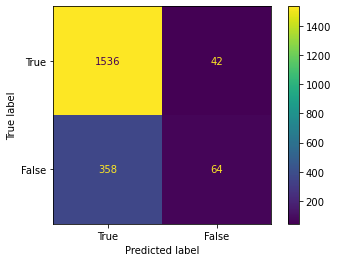

In [54]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix3 = confusion_matrix(y3_test, y_predict3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [True, False])

cm_display.plot()
plt.show()

# Conclusion: There are 1536 True Positive where are there are 64 True Negative and there are 358 False Positve where 42 False Negative

In [55]:
# Different metric values of the model performance 

acc_score3 = round((accuracy_score(y3_test, y_predict3))*100,2)
f1_score3 = round((f1_score(y3_test, y_predict3))*100,2)
recall_score3 = round((recall_score(y3_test, y_predict3))*100,2)
prec_score3 = round((precision_score(y3_test, y_predict3))*100,2)


print('Accuracy  = {}% '.format(acc_score3))
print('F1 Score  = {}% '.format(f1_score3))
print('Recall    = {}% '.format(recall_score3))
print('Precision = {}% '.format(prec_score3))

Accuracy  = 80.0% 
F1 Score  = 24.24% 
Recall    = 15.17% 
Precision = 60.38% 


# Since the F1 score is 24.24% this is a not a good model for predicting the values 

## ROC AUC curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732
Logistic: ROC AUC=0.732
Logistic: ROC AUC=0.753


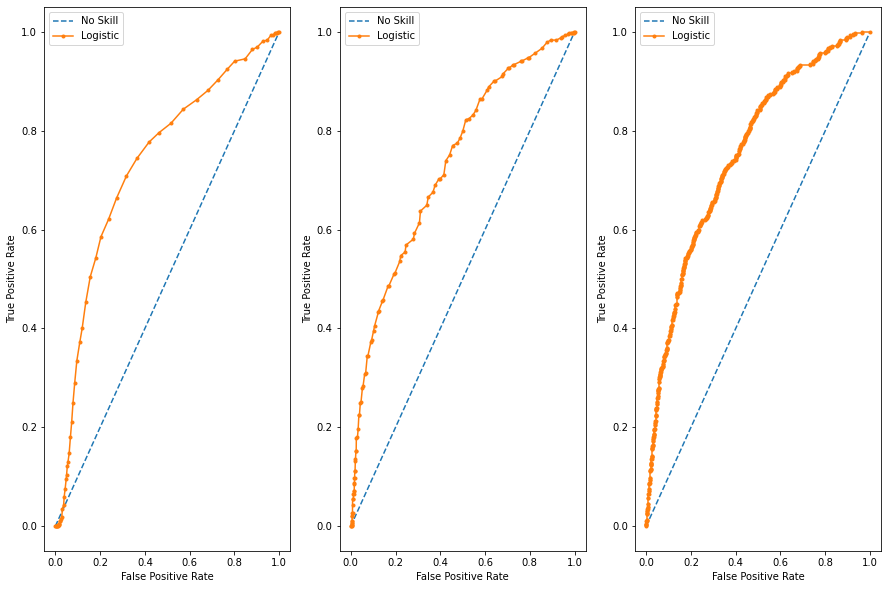

In [56]:
plt.figure(figsize = (15,10))
plt.subplot(131)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y1_test))]   # ns -  no skill

# predict probabilities
lr_probs1 = model_1.predict_proba(x1_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y1_test, ns_probs)
lr_auc1 = roc_auc_score(y1_test, lr_probs1)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y1_test, lr_probs1)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.subplot(132)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y2_test))]   # ns -  no skill

# predict probabilities
lr_probs2 = model_2.predict_proba(x2_test)

# keep probabilities for the positive outcome only
lr_probs2 = lr_probs2[:, 1]

# calculate scores
ns_auc = roc_auc_score(y2_test, ns_probs)
lr_auc2 = roc_auc_score(y2_test, lr_probs2)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y2_test, ns_probs)
lr_fpr2, lr_tpr2, _ = roc_curve(y2_test, lr_probs2)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()


plt.subplot(133)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y3_test))]   # ns -  no skill

# predict probabilities
lr_probs3 = model_3.predict_proba(x3_test)

# keep probabilities for the positive outcome only
lr_probs3 = lr_probs3[:, 1]

# calculate scores
ns_auc = roc_auc_score(y3_test, ns_probs)
lr_auc3 = roc_auc_score(y3_test, lr_probs3)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y3_test, ns_probs)
lr_fpr3, lr_tpr3, _ = roc_curve(y3_test, lr_probs3)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()



# show the plot
plt.show()

In [57]:
auc_df = pd.DataFrame()
auc_df['Model'] = ['Univariate', 'Bivariate' ,'Multi-Variate']
auc_df['AUC Score'] = [lr_auc1,lr_auc2,lr_auc3]
auc_df

,Model,AUC Score
0,Univariate,0.731686
1,Bivariate,0.732221
2,Multi-Variate,0.753005


In [58]:
print(classification_report(y3_test, y_predict3))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.60      0.15      0.24       422

    accuracy                           0.80      2000
   macro avg       0.71      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



In [59]:
f1_left_3 = 24

##  Looking at the accuracy data we can see there is 24 %  F1 score for the predicted the the y values for people who have left the company, hence it is not a good model

# ROC AUC score of Multivariate is better than the other models 

In [60]:
log_reg = pd.DataFrame()
log_reg['Model'] = ['Univariate', 'Bivariate' ,'Multi-Variate']
log_reg['Accuracy'] = [acc_score1, acc_score2, acc_score3]
log_reg['F1 Score'] = [f1_score1, f1_score2, f1_score3]
log_reg['Recall'] = [recall_score1, recall_score2, recall_score3]
log_reg['Precision'] = [prec_score1, prec_score2, prec_score3]
log_reg

,Model,Accuracy,F1 Score,Recall,Precision
0,Univariate,77.20,2.56,1.42,13.04
1,Bivariate,79.85,18.91,11.14,62.67
2,Multi-Variate,80.00,24.24,15.17,60.38


# Conclusion: The F1 score is increasing from univariate to multivariate model. But the value is F1 score is very less hence any of these models are not the ideal model for prediction. However, Multivariate gives the highest accuracy score, therefore out of these three models we can conclude that multivariate Logistic regressor model is better with almost all the metric values higher than other models  

# ----------------------------------------------------------------------------------------------------------- Naive Bayes regression model  

In [61]:
x4 = scaled_df.copy()
x4.drop(['CustomerId','Exited','HasCrCard'], axis =1, inplace = True)
x4.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735
1,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709
2,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654
3,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120
4,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400


In [62]:
y4 = scaled_df['Exited']

In [63]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 10)
x4_train.shape, x4_test.shape, y4_train.shape, y4_test.shape


((8000, 10), (2000, 10), (8000,), (2000,))

In [64]:
y4_train = y4_train.values.reshape(-1,1)
y4_test = y4_test.values.reshape(-1,1)
y4_train.shape, y4_test.shape


((8000, 1), (2000, 1))

In [65]:
model_4 = GaussianNB()
model_4.fit(x4_train, y4_train)

GaussianNB()

In [66]:
y_predict4 = model_4.predict(x4_test)

In [67]:
model4_pred = pd.DataFrame()
model4_pred['Y Actual'] = pd.DataFrame(y4_test)
model4_pred['Y Predicted'] = pd.DataFrame(y_predict4)                                           
model4_pred.round(2)

,Y Actual,Y Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,1,0
1998,0,0


In [68]:
# Accuracy value for Naive Bayes
train_accuracy4 = round(model_4.score(x4_train, y4_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy4))
test_accuracy4 = round(model_4.score(x4_test, y4_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy4))


Train Accuracy = 83.2 %
Test Accuracy = 82.15 %


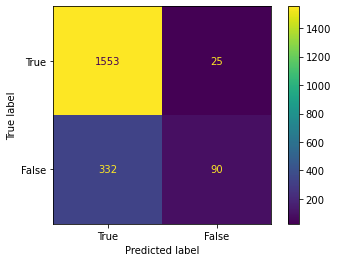

In [69]:
from sklearn import metrics
confusion_matrix4 = confusion_matrix(y4_test, y_predict4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [True, False])

cm_display.plot()
plt.show()


# Conclusion: There are 1553 True Positive where are there are 90 True Negative and there are 332 False Positve where 25 False Negative

In [70]:
acc_score4 = round((accuracy_score(y4_test, y_predict4))*100,2)
f1_score4 = round((f1_score(y4_test, y_predict4))*100,2)
recall_score4 = round((recall_score(y4_test, y_predict4))*100,2)
prec_score4 = round((precision_score(y4_test, y_predict4))*100,2)


print('Accuracy  = {}% '.format(acc_score4))
print('F1 Score  = {}% '.format(f1_score4))
print('Recall    = {}% '.format(recall_score4))
print('Precision = {}% '.format(prec_score4))

Accuracy  = 82.15% 
F1 Score  = 33.52% 
Recall    = 21.33% 
Precision = 78.26% 


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.800


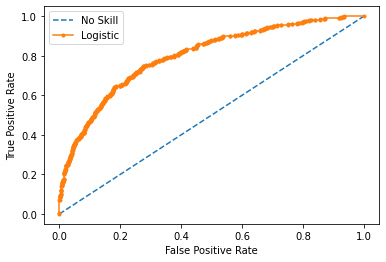

In [71]:

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs = model_4.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc4 = roc_auc_score(y4_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc4))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y4_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()



In [72]:
print(classification_report(y4_test, y_predict4))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1578
           1       0.78      0.21      0.34       422

    accuracy                           0.82      2000
   macro avg       0.80      0.60      0.62      2000
weighted avg       0.82      0.82      0.78      2000



In [73]:
f1_left_4 = 34

##  Looking at the accuracy data we can see there is 34 %  F1 score for the predicted the the y values for people who have left the company, hence it is not a good model

# ----------------------------------------------------------------------------------------------------------- Decision Tree regression model

In [74]:
model_dt = DecisionTreeClassifier()

In [75]:
params = {
    'max_depth' : [3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,3,4,5,6,8,10],
    'min_samples_leaf' : [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10,11,12]
}

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
grid_search = GridSearchCV(estimator=model_dt,
                           param_grid=params,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [77]:
%%time
grid_search.fit(x4_train, y4_train)

Fitting 5 folds for each of 5544 candidates, totalling 27720 fits
CPU times: total: 57.7 s
Wall time: 2min 44s


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 10]},
             scoring='accuracy', verbose=3)

In [78]:
model_dt = grid_search.best_estimator_
model_dt

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=2)

## Also using accuracy calculation method to predict best value for max depth

In [79]:
max_depth_range = list(range(1, 10))# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    clf.fit(x4_train, y4_train)    
    score = clf.score(x4_test, y4_test)
    accuracy.append(score)
    
accuracy

[0.789, 0.83, 0.8335, 0.8465, 0.8485, 0.8475, 0.849, 0.8405, 0.831]

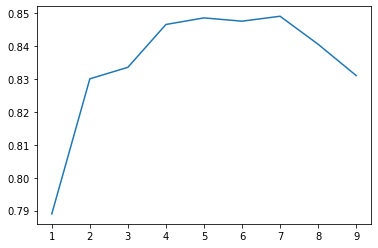

In [80]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(1,10), accuracy)
plt.show()

###  Since the accuracy is highest at max_depth = 5 proceeding with this value

In [81]:
model_5 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=2, random_state=10)
model_5.fit(x4_train, y4_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=2,
                       random_state=10)

In [82]:
y_predict5 = model_5.predict(x4_test)
tree_df = pd.DataFrame()
tree_df['Y predicted'] = pd.DataFrame(y_predict5)
tree_df['Y actual'] = y4_test
tree_df

,Y predicted,Y actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
1995,1,0
1996,0,0
1997,0,1
1998,0,0


In [83]:
# Accuracy value for logistic regression
train_accuracy5 = round(model_5.score(x4_train, y4_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy5))

test_accuracy5 = round(model_5.score(x4_test, y4_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy5))


Train Accuracy = 85.55 %
Test Accuracy = 85.1 %


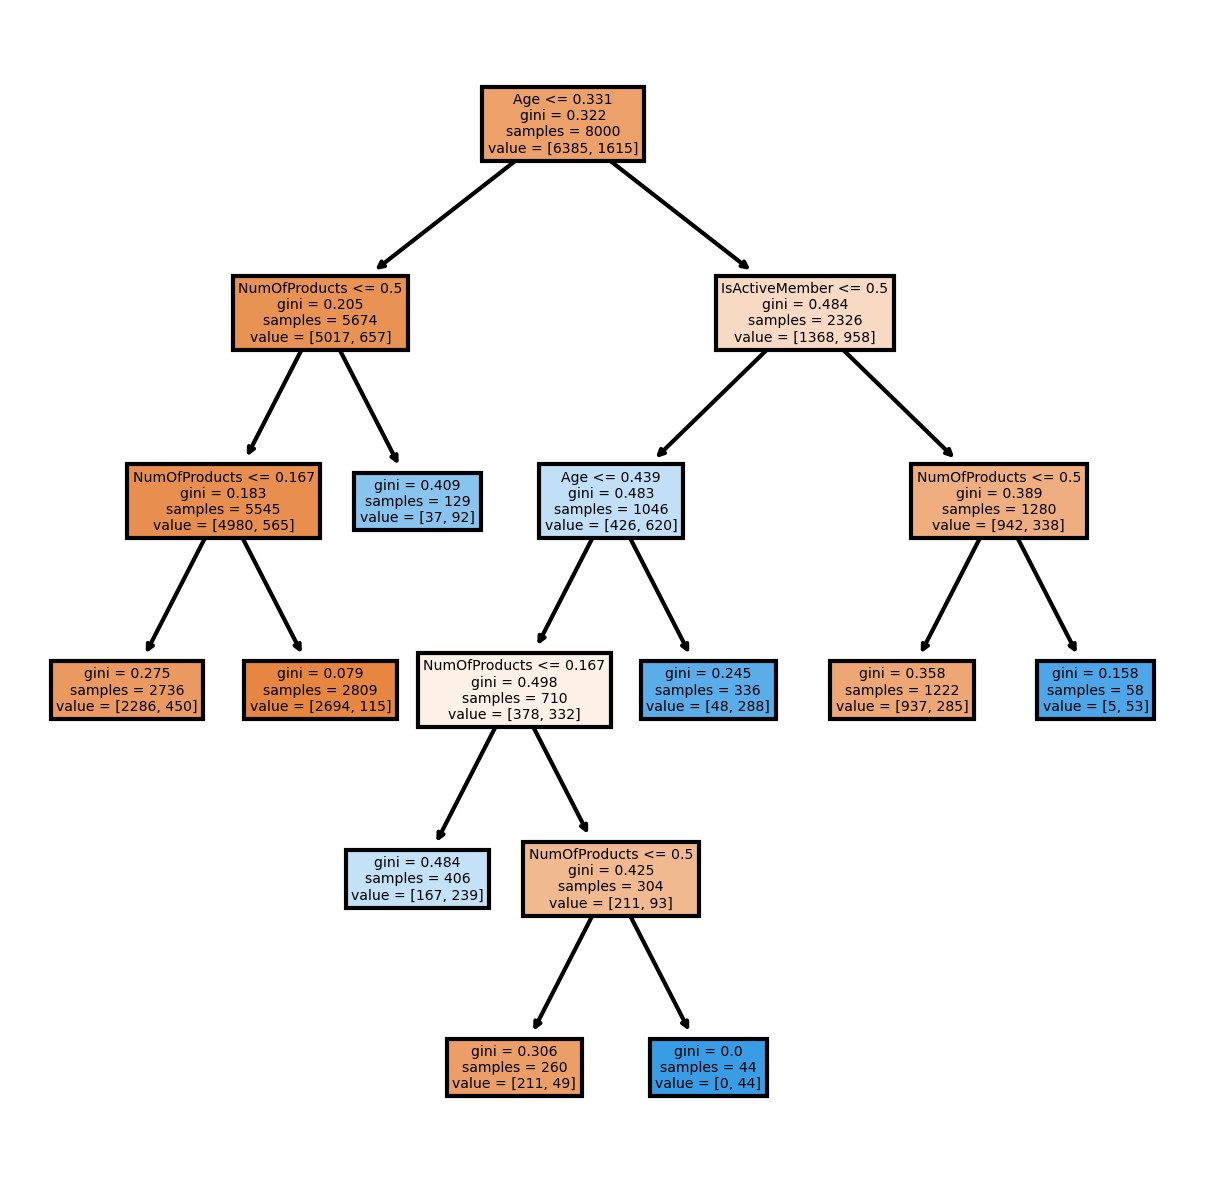

In [84]:
# Creating Tree Map 

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tree.plot_tree(model_5, feature_names = x4_train.columns , filled = True)
plt.show()

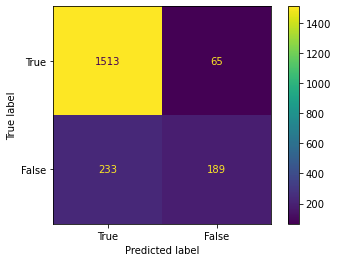

In [85]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix5 = confusion_matrix(y4_test, y_predict5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [True, False])

cm_display.plot()
plt.show()

# Conclusion: There are 1513 True Positive where are there are 189 True Negative and there are 233 False Positve where 65 False Negative

In [86]:
# Different metric values of the model performance 

acc_score5 = round((accuracy_score(y4_test, y_predict5))*100,2)
f1_score5 = round((f1_score(y4_test, y_predict5))*100,2)
recall_score5 = round((recall_score(y4_test, y_predict5))*100,2)
prec_score5 = round((precision_score(y4_test, y_predict5))*100,2)


print('Accuracy  = {}% '.format(acc_score5))
print('F1 Score  = {}% '.format(f1_score5))
print('Recall    = {}% '.format(recall_score5))
print('Precision = {}% '.format(prec_score5))


Accuracy  = 85.1% 
F1 Score  = 55.92% 
Recall    = 44.79% 
Precision = 74.41% 


In [87]:
# evaluate the model using cross validation

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

n_scores51 = cross_val_score(model_5, x4, y4, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_scores52 = cross_val_score(model_5, x4, y4, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores53 = cross_val_score(model_5, x4, y4, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
n_scores54 = cross_val_score(model_5, x4, y4, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

# report performance     
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores51), np.std(n_scores51)))
print('Accuracy-Score: %.3f (%.3f)' % (np.mean(n_scores52), np.std(n_scores52)))
print('Recall-Score: %.3f (%.3f)' % (np.mean(n_scores53), np.std(n_scores53)))
print('Precision-Score: %.3f (%.3f)' % (np.mean(n_scores54), np.std(n_scores54)))

F1-Score: 0.528 (0.044)
Accuracy-Score: 0.850 (0.009)
Recall-Score: 0.416 (0.052)
Precision-Score: 0.733 (0.044)


# The F1 score here is just above the threshold value hence this model is a good model

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.798


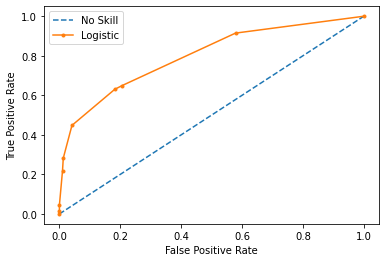

In [88]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs = model_5.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc5 = roc_auc_score(y4_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc5))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y4_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# Since AUC score is 79.8% this model is a good model for predicting values

In [89]:
print(classification_report(y4_test, y_predict5))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.74      0.45      0.56       422

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [90]:
f1_left_5 = 56

##  Looking at the accuracy data we can see there is 56 %  F1 score for the predicted the the y values for people who have left the company, hence it is a good model

# ----------------------------------------------------------------------------------------------------------- Random Forest regression model - Bagging method

In [91]:
model_rf = RandomForestClassifier(random_state=10)

In [92]:
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

In [93]:
grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=params, cv = 3,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [94]:
%%time
grid_search.fit(x4_train, y4_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
CPU times: total: 3.3 s
Wall time: 53.3 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [95]:
model_rf_best = grid_search.best_estimator_
model_rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10)

In [96]:
model_6 = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50, random_state=10)
model_6.fit(x4_train,y4_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10)

In [97]:
# Y predicted values 
y_predict6 = model_6.predict(x4_test)

model6_pred = pd.DataFrame()
model6_pred['Y Actual'] = pd.DataFrame(y4_test)
model6_pred['Y Predicted'] = pd.DataFrame(y_predict6)
model6_pred.round(2)


,Y Actual,Y Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
1995,0,1
1996,0,0
1997,1,0
1998,0,0


In [98]:
# Accuracy value for logistic regression
train_accuracy6 = round(model_6.score(x4_train, y4_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy6))

test_accuracy6 = round(model_6.score(x4_test, y4_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy6))

Train Accuracy = 88.62 %
Test Accuracy = 85.5 %


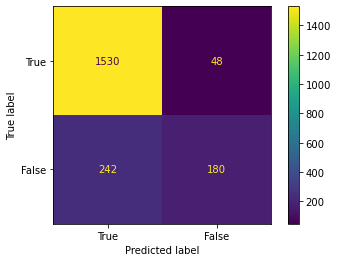

In [99]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix6 = confusion_matrix(y4_test, y_predict6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix6, display_labels = [True, False])

cm_display.plot()
plt.show()



# Conclusion: There are 1530 True Positive where are there are 180 True Negative and there are 242 False Positve where 48 False Negative

In [100]:
acc_score6 = round((accuracy_score(y4_test, y_predict6))*100,2)
f1_score6 = round((f1_score(y4_test, y_predict6))*100,2)
recall_score6 = round((recall_score(y4_test, y_predict6))*100,2)
prec_score6 = round((precision_score(y4_test, y_predict6))*100,2)


print('Accuracy  = {}% '.format(acc_score6))
print('F1 Score  = {}% '.format(f1_score6))
print('Recall    = {}% '.format(recall_score6))
print('Precision = {}% '.format(prec_score6))


Accuracy  = 85.5% 
F1 Score  = 55.38% 
Recall    = 42.65% 
Precision = 78.95% 


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.856


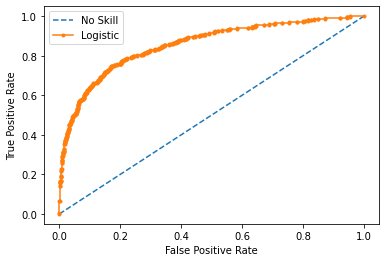

In [101]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs = model_6.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc6 = roc_auc_score(y4_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc6))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y4_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [102]:
print(classification_report(y4_test, y_predict6))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1578
           1       0.79      0.43      0.55       422

    accuracy                           0.85      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.85      0.84      2000



In [103]:
f1_left_6 = 55

##  Looking at the accuracy data we can see there is 55 %  F1 score for the predicted the the y values for people who have left the company, hence it is a good model

# Evaluating Random Forest - Boosting model using cross validation

In [104]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

n_scores61 = cross_val_score(model_6, x4, y4, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_scores62 = cross_val_score(model_6, x4, y4, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores63 = cross_val_score(model_6, x4, y4, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
n_scores64 = cross_val_score(model_6, x4, y4, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

# report performance     
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores61), np.std(n_scores61)))
print('Accuracy-Score: %.3f (%.3f)' % (np.mean(n_scores62), np.std(n_scores62)))
print('Recall-Score: %.3f (%.3f)' % (np.mean(n_scores63), np.std(n_scores63)))
print('Precision-Score: %.3f (%.3f)' % (np.mean(n_scores64), np.std(n_scores64)))

F1-Score: 0.551 (0.029)
Accuracy-Score: 0.860 (0.007)
Recall-Score: 0.424 (0.033)
Precision-Score: 0.792 (0.040)


# ----------------------------------------------------------------------------------------------------------- Random Forest regression model - Adaboosting method

In [105]:
model_7 = AdaBoostClassifier(n_estimators=200, random_state = 10)

In [106]:
model_7.fit(x4_train, y4_train)

AdaBoostClassifier(n_estimators=200, random_state=10)

In [107]:
# Y predicted values 
y_predict7 = model_7.predict(x4_test)

model7_pred = pd.DataFrame()
model7_pred['Y Actual'] = pd.DataFrame(y4_test)
model7_pred['Y Predicted'] = pd.DataFrame(y_predict7)
model7_pred.round(2)

,Y Actual,Y Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
1995,0,1
1996,0,0
1997,1,0
1998,0,1


In [108]:
# Accuracy value for logistic regression
train_accuracy7 = round(model_7.score(x4_train, y4_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy7))

test_accuracy7 = round(model_7.score(x4_test, y4_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy7))

Train Accuracy = 86.26 %
Test Accuracy = 84.95 %


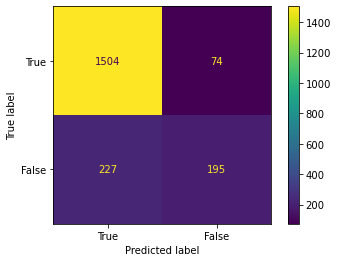

In [109]:
# Confusion Matrix 
from sklearn import metrics
confusion_matrix7 = confusion_matrix(y4_test, y_predict7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix7, display_labels = [True, False])

cm_display.plot()
plt.show()


## Conclusion: There are 1504 True Positive where are there are 195 True Negative and there are 227 False Positve where 74 False Negative

In [110]:
# Different metric values of the model performance 

acc_score7 = round((accuracy_score(y4_test, y_predict7))*100,2)
f1_score7 = round((f1_score(y4_test, y_predict7))*100,2)
recall_score7 = round((recall_score(y4_test, y_predict7))*100,2)
prec_score7 = round((precision_score(y4_test, y_predict7))*100,2)


print('Accuracy  = {}% '.format(acc_score7))
print('F1 Score  = {}% '.format(f1_score7))
print('Recall    = {}% '.format(recall_score7))
print('Precision = {}% '.format(prec_score7))


Accuracy  = 84.95% 
F1 Score  = 56.44% 
Recall    = 46.21% 
Precision = 72.49% 


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.839


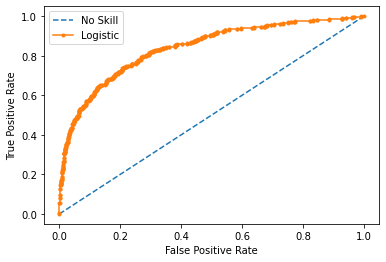

In [111]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs = model_7.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc7 = roc_auc_score(y4_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc7))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y4_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# evaluating the model using cross validation

In [112]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

n_scores71 = cross_val_score(model_7, x4, y4, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_scores72 = cross_val_score(model_7, x4, y4, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores73 = cross_val_score(model_7, x4, y4, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
n_scores74 = cross_val_score(model_7, x4, y4, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

# report performance     
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores71), np.std(n_scores71)))
print('Accuracy-Score: %.3f (%.3f)' % (np.mean(n_scores72), np.std(n_scores72)))
print('Recall-Score: %.3f (%.3f)' % (np.mean(n_scores73), np.std(n_scores73)))
print('Precision-Score: %.3f (%.3f)' % (np.mean(n_scores74), np.std(n_scores74)))

F1-Score: 0.570 (0.037)
Accuracy-Score: 0.855 (0.010)
Recall-Score: 0.473 (0.043)
Precision-Score: 0.720 (0.040)


In [113]:
print(classification_report(y4_test, y_predict7))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.72      0.46      0.56       422

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [114]:
f1_left_7 = 56

##  Looking at the accuracy data we can see there is 56 %  F1 score for the predicted the the y values for people who have left the company, hence it is a good model

# ----------------------------------------------------------------------------------------------------------- Stacking

In [115]:
def get_stacking():
# define the base models

    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('svm', SVC()))
    
    # define meta learner model
    level1 = DecisionTreeClassifier()
    
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
    return model


In [116]:
model_8 = get_stacking()
# evaluate the model

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

n_scores81 = cross_val_score(model_8, x4, y4, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_scores82 = cross_val_score(model_8, x4, y4, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores83 = cross_val_score(model_8, x4, y4, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
n_scores84 = cross_val_score(model_8, x4, y4, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

# report performance     
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores81), np.std(n_scores81)))
print('Accuracy-Score: %.3f (%.3f)' % (np.mean(n_scores82), np.std(n_scores82)))
print('Recall-Score: %.3f (%.3f)' % (np.mean(n_scores83), np.std(n_scores83)))
print('Precision-Score: %.3f (%.3f)' % (np.mean(n_scores84), np.std(n_scores84)))


F1-Score: 0.472 (0.025)
Accuracy-Score: 0.782 (0.013)
Recall-Score: 0.477 (0.028)
Precision-Score: 0.469 (0.029)


In [117]:
model_8.fit(x4_train, y4_train)

StackingClassifier(cv=3,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC())],
                   final_estimator=DecisionTreeClassifier())

In [118]:
y_predict8 = model_8.predict(x4_test)
model8_pred = pd.DataFrame()
model8_pred['Y Actual'] = pd.DataFrame(y4_test)
model8_pred['Y Predicted'] = pd.DataFrame(y_predict8)
model8_pred.round(2)

,Y Actual,Y Predicted
0,0,1
1,0,1
2,1,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,1,1
1998,0,0


In [119]:
# Accuracy value for logistic regression
train_accuracy8 = round(model_6.score(x4_train, y4_train)*100,2)
print("Train Accuracy = {} %".format(train_accuracy8))

test_accuracy8 = round(model_6.score(x4_test, y4_test)*100 , 2)
print("Test Accuracy = {} %".format(test_accuracy8))

Train Accuracy = 88.62 %
Test Accuracy = 85.5 %


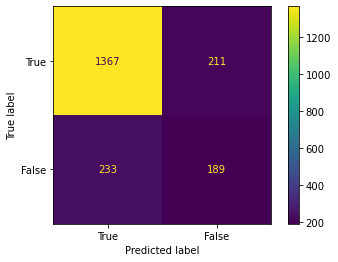

In [120]:
# Confusion Matrix 

from sklearn import metrics
confusion_matrix8 = confusion_matrix(y4_test, y_predict8)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix8, display_labels = [True, False])

cm_display.plot()
plt.show()


## Conclusion: There are 1379 True Positive where are there are 190 True Negative and there are 232 False Positve where 199 False Negative

In [121]:
acc_score8 = round((accuracy_score(y4_test, y_predict8))*100,2)
f1_score8 = round((f1_score(y4_test, y_predict8))*100,2)
recall_score8 = round((recall_score(y4_test, y_predict8))*100,2)
prec_score8 = round((precision_score(y4_test, y_predict8))*100,2)


print('Accuracy  = {}% '.format(acc_score8))
print('F1 Score  = {}% '.format(f1_score8))
print('Recall    = {}% '.format(recall_score8))
print('Precision = {}% '.format(prec_score8))

Accuracy  = 77.8% 
F1 Score  = 45.99% 
Recall    = 44.79% 
Precision = 47.25% 


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.657


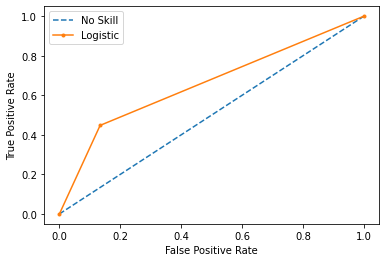

In [122]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs = model_8.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc8 = roc_auc_score(y4_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc8))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y4_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [123]:
print(classification_report(y4_test, y_predict8))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1578
           1       0.47      0.45      0.46       422

    accuracy                           0.78      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.77      0.78      0.78      2000



In [124]:
f1_left_8 = 47

##  Looking at the accuracy data we can see there is 47 %  F1 score for the predicted the the y values for people who have left the company, hence it is a good model

# -----------------------------------------------------------------------------------------------------------
# CONCLUSION DF

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.753
Naive bayes: ROC AUC=0.800
Decision tree: ROC AUC=0.798
Bagging: ROC AUC=0.856
Boosting - Adaboost: ROC AUC=0.839
Stacking: ROC AUC=0.657


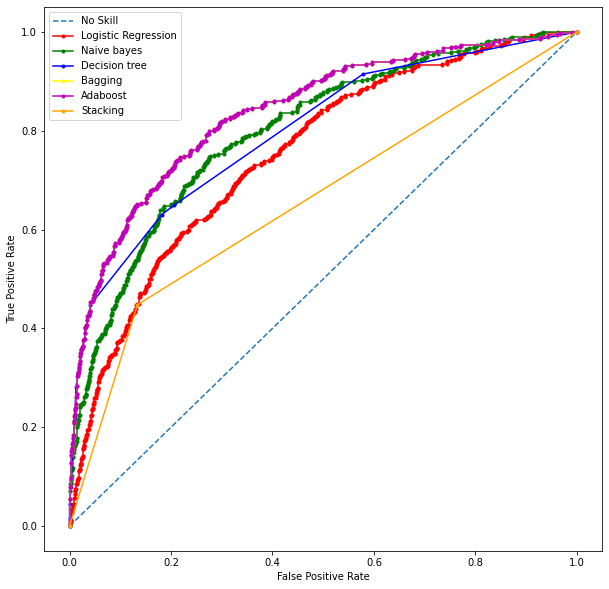

In [129]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y4_test))]   # ns -  no skill

# predict probabilities
lr_probs3 = model_3.predict_proba(x4_test)
lr_probs4 = model_4.predict_proba(x4_test)
lr_probs5 = model_5.predict_proba(x4_test)
lr_probs6 = model_6.predict_proba(x4_test)
lr_probs7 = model_7.predict_proba(x4_test)
lr_probs8 = model_8.predict_proba(x4_test)

# keep probabilities for the positive outcome only
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]
lr_probs6 = lr_probs6[:, 1]
lr_probs7 = lr_probs7[:, 1]
lr_probs8 = lr_probs8[:, 1]


# calculate scores
ns_auc = roc_auc_score(y4_test, ns_probs)
lr_auc3 = roc_auc_score(y4_test, lr_probs3)
lr_auc4 = roc_auc_score(y4_test, lr_probs4)
lr_auc5 = roc_auc_score(y4_test, lr_probs5)
lr_auc6 = roc_auc_score(y4_test, lr_probs6)
lr_auc7 = roc_auc_score(y4_test, lr_probs7)
lr_auc8 = roc_auc_score(y4_test, lr_probs8)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc3))
print('Naive bayes: ROC AUC=%.3f' % (lr_auc4))
print('Decision tree: ROC AUC=%.3f' % (lr_auc5))
print('Bagging: ROC AUC=%.3f' % (lr_auc6))
print('Boosting - Adaboost: ROC AUC=%.3f' % (lr_auc7))
print('Stacking: ROC AUC=%.3f' % (lr_auc8))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y4_test, ns_probs)
lr_fpr3, lr_tpr3, _3 = roc_curve(y4_test, lr_probs3)
lr_fpr4, lr_tpr4, _4 = roc_curve(y4_test, lr_probs4)
lr_fpr5, lr_tpr5, _5 = roc_curve(y4_test, lr_probs5)
lr_fpr6, lr_tpr6, _6 = roc_curve(y4_test, lr_probs7)
lr_fpr7, lr_tpr7, _7 = roc_curve(y4_test, lr_probs7)
lr_fpr8, lr_tpr8, _8 = roc_curve(y4_test, lr_probs8)

# plot the roc curve for the model
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Logistic Regression', color = 'r')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label='Naive bayes', color = 'g')
plt.plot(lr_fpr5, lr_tpr5, marker='.', label='Decision tree', color = 'b')
plt.plot(lr_fpr6, lr_tpr6, marker='.', label='Bagging ', color = 'yellow')
plt.plot(lr_fpr7, lr_tpr7, marker='.', label='Adaboost', color = 'm')
plt.plot(lr_fpr8, lr_tpr8, marker='.', label='Stacking', color = 'orange')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [130]:
compare = pd.DataFrame()
compare['Model'] = ['Multi-Variate Log Reg', 'Naive bayes', 'Decision Tree','Bagging','Adaboosting','Stacking']
compare['Train Accuracy'] = [test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8]
compare['Test Accuracy'] = [train_accuracy3, train_accuracy4, train_accuracy5 , train_accuracy6, train_accuracy7, train_accuracy8]
compare['Accuracy'] = [acc_score3, acc_score4, acc_score5, acc_score6, acc_score7, acc_score8]
compare['F1 Score'] = [f1_score3, f1_score4, f1_score5, f1_score6, f1_score7, f1_score8]
compare['Recall'] = [recall_score3,recall_score4, recall_score5, recall_score6, recall_score7, recall_score8]
compare['Precision'] = [prec_score3, prec_score4, prec_score5, prec_score6, prec_score7, prec_score8]
compare['ROC AUC'] = [round((lr_auc3)*100,2),round((lr_auc4)*100,2),round((lr_auc5)*100,2),round((lr_auc6)*100,2),round((lr_auc7)*100,2),round((lr_auc8)*100,2)]
compare['F1- exit'] = [f1_left_3, f1_left_4, f1_left_5, f1_left_6, f1_left_7, f1_left_8]
compare 

,Model,Train Accuracy,Test Accuracy,Accuracy,F1 Score,Recall,Precision,ROC AUC,F1- exit
0,Multi-Variate Log Reg,80.00,81.06,80.00,24.24,15.17,60.38,75.30,24
1,Naive bayes,82.15,83.20,82.15,33.52,21.33,78.26,80.00,34
2,Decision Tree,85.10,85.55,85.10,55.92,44.79,74.41,79.85,56
3,Bagging,85.50,88.62,85.50,55.38,42.65,78.95,85.63,55
4,Adaboosting,84.95,86.26,84.95,56.44,46.21,72.49,83.93,56
5,Stacking,85.50,88.62,77.80,45.99,44.79,47.25,65.71,47


# Random Forest Adaboosting is a better model as the F1 score is the highest along with the F1 score for the exit label
# In the ROC AUC Curve also it is visible that the Random Forest Adaboosting is a better model as it has a bigger curve